# Tools for Statistical Analysis

* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**

## Table of Contents

- [Introduction](#introduction)
- [Monte Carlo Simulation](#monte-carlo-simulation)
    - [Pi Calculation](#pi-calculation)
    - [Mensch Game](#mensch-game)
- [Central Limit Theorem](#central-limit-theorem)
- [Hypothese Testing](#hypothese-testing)
    - [Unfair Coin](#unfair-coin)
    - [T-Test](#t-test)
    - [Job Placement](#job-placement)
- [Questions](#questions)
    - [Question 1](#question-1)
    - [Question 2](#question-2)
    - [Question 3](#question-3)
    - [Question 4](#question-4)
    - [Question 5](#question-5)
    - [Question 6](#question-6)

## Introduction

In this assignment, we are going to get acquainted with and implement some tools for
statistical analysis. These tools could come to your help in your future research and projects.

## Setting Up the Environment

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install tqdm
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
from scipy.optimize import curve_fit
from scipy.stats import norm
import random

C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
user32
tzres.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libansari.R6EA3HQP5KZ6TAXU4Y4ZVTRPT7UVA53Z.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libbanded5x.7J4WS2QZKMXGIZDNNWWXUXE52PU2TOEI.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libbispeu.7AH3PCQ2E2NGLC3AQD7FFAH73KGJTZCJ.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libblkdta00.MVYK4IMPWHTMFZE66OC6K7KR6X3K76U2.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libchkder.G7WSOGIYYQO3UWFVEZ3PPXCXR53ADVPA.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libcobyla2.25EVUSEBAW7VKISARB7LO3UGZPN2HXE3.gfortran-win

## Monte Carlo Simulation

In this section, we will learn more about Monte Carlo Simulation and understand how it can help us to model and analyze complex systems, where analytical or closed-form solutions are difficult.

### Pi Calculation

In this part, we are going to use Monte Carlo Simulation to calculate the value of Pi. The idea is to randomly generate points within a square and determine how many fall in a circle inscribed by the square. By comparing the points inside the circle to the total number of points we can approximate the Pi number.

In [3]:
def calculate_pi(n_points: int) -> float:
    #Calculate the value of pi using the Monte Carlo method.
    n_inside = 0
    for _ in range(n_points):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            n_inside += 1
    return 4 * n_inside / n_points

In [17]:
def plot_pi(n_rounds: int, n_points: int) -> None:
    # plot the distribution of pi values calculated using the Monte Carlo method.
    # fit a normal distribution to the data and plot the density of the normal distribution.
    # return the mean and standard deviation of the pi values.
    # also return the mean and standard deviation of the error in the pi values.
    pi_values = n_rounds * [0]
    error_values = n_rounds * [0]
    for idx in tqdm.tqdm(range(n_rounds)):
        pi_values[idx] = calculate_pi(n_points)
        error_values[idx] = np.abs(np.pi - pi_values[idx])
    sns.histplot(pi_values, kde=True)
    plt.xlabel('Value of pi')
    plt.ylabel('Density')
    plt.title('Distribution of pi values')
    plt.show()
    pi_mean = np.mean(pi_values)
    pi_std = np.std(pi_values)
    error_mean = np.mean(error_values)
    error_std = np.std(error_values)
    print(f'Mean of pi values:                      {pi_mean:0.7f}')
    print(f'Standard deviation of pi values:        {pi_std:0.7f}')
    print(f'Mean of error values:                   {error_mean:0.7f}')
    print(f'Standard deviation of error values:     {error_std}')

100%|██████████| 100/100 [00:00<00:00, 23920.98it/s]


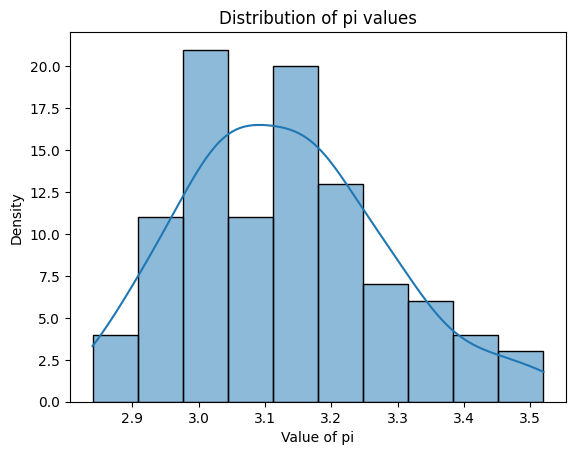

Mean of pi values:                      3.1300000
Standard deviation of pi values:        0.1504527
Mean of error values:                   0.1220637
Standard deviation of error values:     0.08871776180531059


In [18]:
plot_pi(n_rounds=100, n_points=100)

100%|██████████| 100/100 [00:00<00:00, 2355.91it/s]


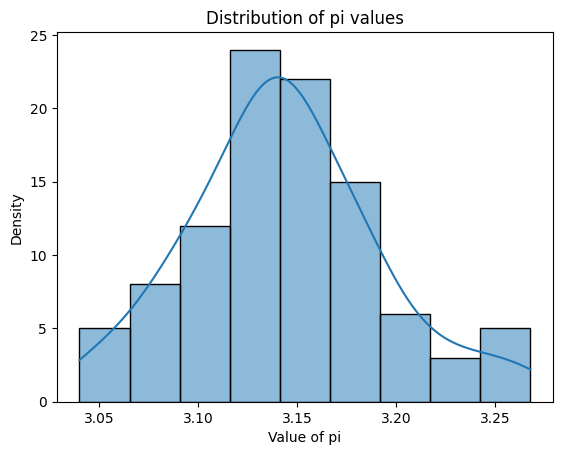

Mean of pi values:                      3.1433600
Standard deviation of pi values:        0.0480024
Mean of error values:                   0.0367681
Standard deviation of error values:     0.030910472089563157


In [19]:
plot_pi(n_rounds=100, n_points=1000)

100%|██████████| 100/100 [00:00<00:00, 216.91it/s]


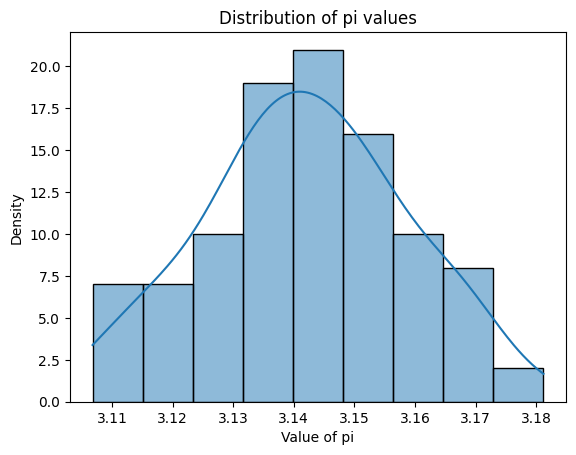

Mean of pi values:                      3.1419600
Standard deviation of pi values:        0.0165541
Mean of error values:                   0.0133043
Standard deviation of error values:     0.009857358082540636


In [20]:
plot_pi(n_rounds=100, n_points=10000)

  5%|▌         | 5/100 [00:00<00:05, 18.91it/s]

100%|██████████| 100/100 [00:04<00:00, 22.84it/s]


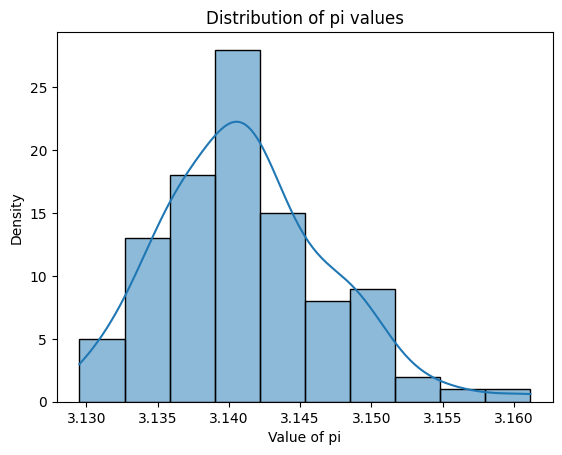

Mean of pi values:                      3.1412100
Standard deviation of pi values:        0.0057521
Mean of error values:                   0.0044872
Standard deviation of error values:     0.0036190412251008506


In [21]:
plot_pi(n_rounds=100, n_points=100000)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:41<00:00,  2.41it/s]


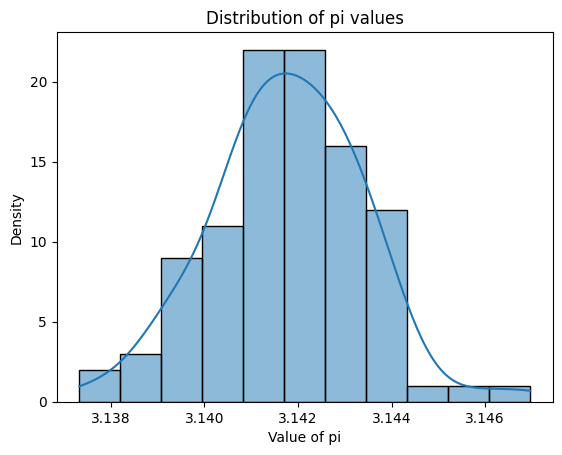

Mean of pi values:                      3.1417765
Standard deviation of pi values:        0.0016166
Mean of error values:                   0.0012807
Standard deviation of error values:     0.0010035398271370072


In [22]:
plot_pi(n_rounds=100, n_points=1000000)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:59<00:00,  3.96s/it]


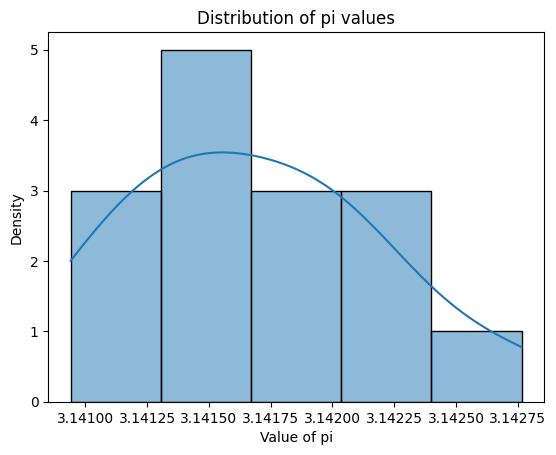

Mean of pi values:                      3.1416833
Standard deviation of pi values:        0.0004985
Mean of error values:                   0.0004177
Standard deviation of error values:     0.0002868370214384596


In [24]:
plot_pi(n_rounds=25, n_points=10000000)

/tmp/ipykernel_11343/2144802263.py:5: RuntimeWarning: divide by zero encountered in divide
  return coeff1*1/(x**11) + coeff2*1/(x**10) + coeff3*1/(x**9) + coeff4*1/(x**8) + coeff5*1/(x**7) + coeff6*1/(x**6) + coeff7*1/(x**5) + coeff8*1/(x**4) + coeff9*1/(x**3) + coeff10*1/(x**2) + coeff11*1/x + coeff12
/tmp/ipykernel_11343/2144802263.py:5: RuntimeWarning: invalid value encountered in add
  return coeff1*1/(x**11) + coeff2*1/(x**10) + coeff3*1/(x**9) + coeff4*1/(x**8) + coeff5*1/(x**7) + coeff6*1/(x**6) + coeff7*1/(x**5) + coeff8*1/(x**4) + coeff9*1/(x**3) + coeff10*1/(x**2) + coeff11*1/x + coeff12


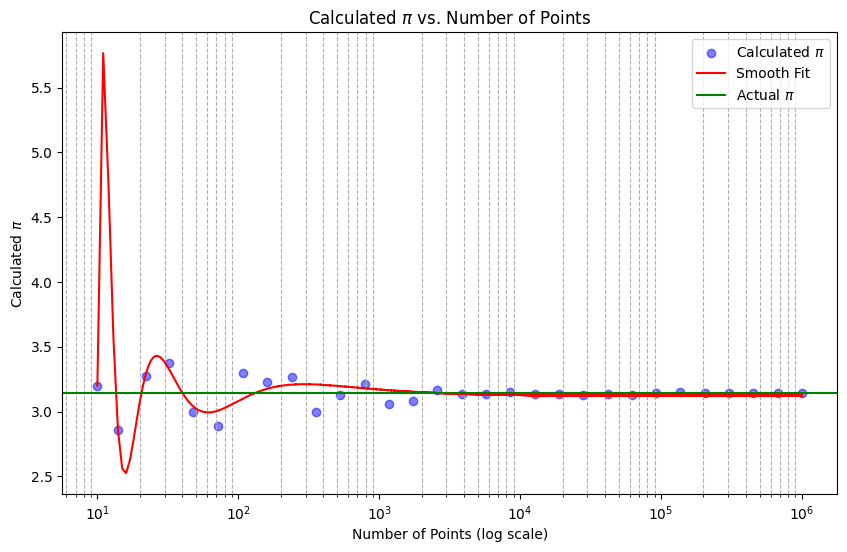

In [91]:
def damped_wave(x, a, omega1, omega2, phi1, phi2, c):
    return a * np.exp(-c * x) * (np.sin(omega1 * x + phi1) + np.cos(omega2 * x + phi2))

def damped_wave1(x, coeff1, coeff2, coeff3, coeff4, coeff5, coeff6, coeff7, coeff8, coeff9, coeff10, coeff11, coeff12):
    return coeff1*1/(x**11) + coeff2*1/(x**10) + coeff3*1/(x**9) + coeff4*1/(x**8) + coeff5*1/(x**7) + coeff6*1/(x**6) + coeff7*1/(x**5) + coeff8*1/(x**4) + coeff9*1/(x**3) + coeff10*1/(x**2) + coeff11*1/x + coeff12

def plot_pi_versus_n_points(max_points: int) -> None:
    n_points = np.logspace(1, np.log10(max_points), num=30, dtype=int)
    pi_values = [calculate_pi(n) for n in n_points]

    p0 = [2, 0.5, 0.5, 0.2, 0.2, 0.1, 0.1, 0.05, 0.05, 0.02, 0.02, 0.01]
    popt, pcov = curve_fit(damped_wave1, n_points, pi_values, maxfev=max_points, p0=p0)
    smooth_x = np.logspace(1, np.log10(max_points), num=max_points, dtype=int)
    smooth_y = damped_wave1(smooth_x, *popt)

    plt.figure(figsize=(10, 6))
    plt.scatter(n_points, pi_values, color='blue', label='Calculated $\pi$', alpha=0.5)
    plt.plot(smooth_x, smooth_y, 'r-', label='Smooth Fit')
    plt.axhline(y=np.pi, color='g', linestyle='-', label='Actual $\pi$')
    plt.xscale('log')
    plt.title('Calculated $\pi$ vs. Number of Points')
    plt.xlabel('Number of Points (log scale)')
    plt.ylabel('Calculated $\pi$')
    plt.legend()
    plt.grid(True, ls="--", which='minor')
    plt.show()

plot_pi_versus_n_points(1000000)

#### Analysis

As we can see, we can use the Monte Carlo Simulation to estimate the value of Pi. The more points we use, the more accurate the result will be. However, the accuracy of the result is not only dependent on the number of points, but also on the distribution of the points. If the points are not distributed uniformly, the result will not be accurate.

### Mensch Game

Mensch is a very old German game, which is also popular in our country. You can learn more about Mensch and its rules in [this](https://en.wikipedia.org/wiki/Mensch_%C3%A4rgere_Dich_nicht) link.  
We are going to analyze the simpler version of this game in which every player only has one piece in the game. So basically, every player only rolls dice in his turns and moves his piece. So, everything is purely based on chance. We want to calculate the probability of winning for
each of the 1st, 2nd, 3rd, and 4th players in this game.

#### Game Simulation

In [10]:
def simulate_mensch(board_size=40, num_players=4, num_pieces=4, dice_sides=6):
    init_positions = [idx for idx in range(0, board_size, board_size//num_players)]
    positions = num_players * [-1]
    turn = 1
    player = 0
    while True:
        roll = random.randint(1, dice_sides)
        if positions[player] == -1:
            if roll == 6:
                positions[player] = init_positions[player]
        else:
            temp_new_position = positions[player] + roll
            if temp_new_position > board_size + init_positions[player] - 1:
                if temp_new_position <= board_size + init_positions[player] + num_pieces - 1:
                    return player, turn
            else:
                positions[player] = temp_new_position
                for idx, pos in enumerate(positions):
                    if idx != player and pos % board_size == positions[player] % board_size:
                        if pos != init_positions[idx]:
                            positions[idx] = -1
        if roll != 6:
            player = (player + 1) % num_players
        turn += 1
        

In [97]:
def run_mensch_simulation(n_rounds=10000, board_size=40, num_players=4, num_pieces=1, dice_sides=6):
    results = [simulate_mensch(board_size=board_size, num_players=num_players, num_pieces=num_pieces, dice_sides=dice_sides) for _ in tqdm.tqdm(range(n_rounds))]
    results_df = pd.DataFrame(results, columns=['winner', 'turn'])
    return results_df

results_df = run_mensch_simulation(n_rounds=100000, num_pieces=1)

100%|██████████| 100000/100000 [00:09<00:00, 10510.63it/s]


#### Distribution of the Game Turns

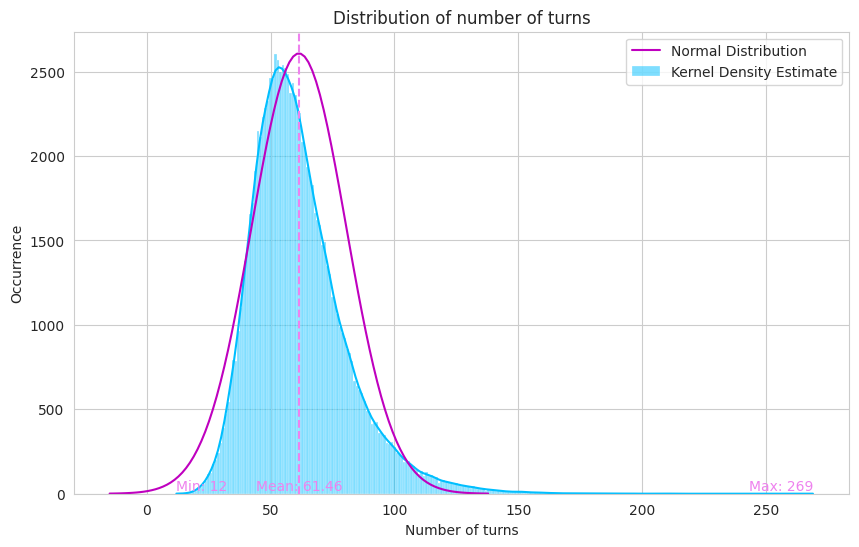

In [98]:
def show_turns_distribution(results_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(results_df['turn'], kde=True, color='deepskyblue', alpha=0.5, label='Kernel Density Estimate', discrete=True)
    plt.axvline(results_df['turn'].mean(), color='violet', alpha=1, linestyle='dashed')
    mu, std = results_df['turn'].mean(), results_df['turn'].std()
    x = np.linspace(mu - 4*std, mu + 4*std, 100)
    p = norm.pdf(x, mu, std)
    p = p * max(results_df['turn'].value_counts()) / max(p)
    plt.text(mu, 0, f'Mean: {mu:0.2f}', ha='center', va='bottom', color='violet')
    plt.text(results_df['turn'].min(), 0, f'Min: {results_df["turn"].min()}', ha='left', va='bottom', color='violet')
    plt.text(results_df['turn'].max(), 0, f'Max: {results_df["turn"].max()}', ha='right', va='bottom', color='violet')
    plt.plot(x, p, label='Normal Distribution', color='m')
    plt.xlabel('Number of turns')
    plt.ylabel('Occurrence')
    plt.title('Distribution of number of turns')
    plt.legend()
    plt.show()

show_turns_distribution(results_df)

#### Distribution of the Winners

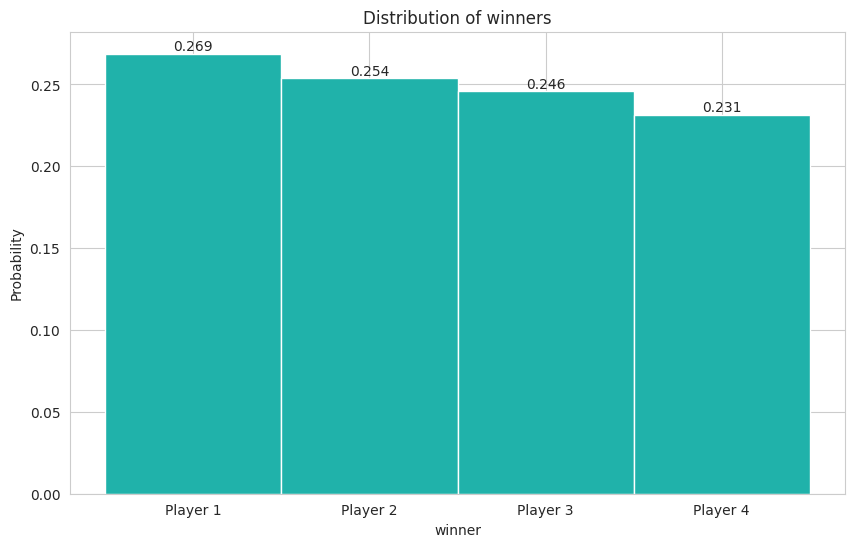

In [99]:
def show_winner_distribution(results_df, num_players=4):
    plt.figure(figsize=(10, 6))
    sns.histplot(results_df['winner'], color='lightseagreen', alpha=1, discrete=True, stat='probability')
    # only show descrete values on the x-axis
    plt.xticks(np.arange(num_players), [f'Player {idx+1}' for idx in range(num_players)])
    for idx, count in results_df['winner'].value_counts(normalize=True).items():
        plt.text(idx, count, f'{count:.3f}', ha='center', va='bottom')
    plt.ylabel('Probability')
    plt.title('Distribution of winners')
    plt.show()

show_winner_distribution(results_df)

#### Analysis

As we can see from the results, the probability of winning for all players is almost the same. This is because the game is purely based on chance and there is no strategy involved. So, the probability of winning for each player is almost 0.25.  
But, as we can see, the probability of winning for the 1st player is a little bit higher than the others. This is because the 1st player has the first turn and has a little bit more chance to win the game. This is also the reason why the probability of winning for the 4th player is a little bit lower than the others. By other words, in this game, the order of the players is important and thus, the prior players have a little bit more chance to win the game.  

We can decrease the effect of the order of the players by increasing the `board_size`, so the game will be longer and the effect of the order of the players will be decreased.

100%|██████████| 10000/10000 [01:16<00:00, 130.32it/s]


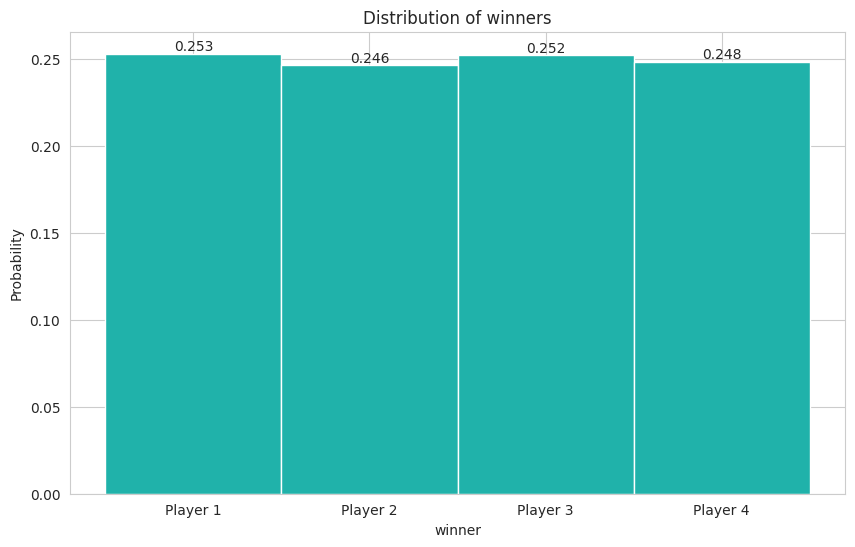

In [103]:
high_board_size_results_df = run_mensch_simulation(n_rounds=10000, board_size=4000)
show_winner_distribution(high_board_size_results_df)

100%|██████████| 50000/50000 [06:15<00:00, 133.13it/s]


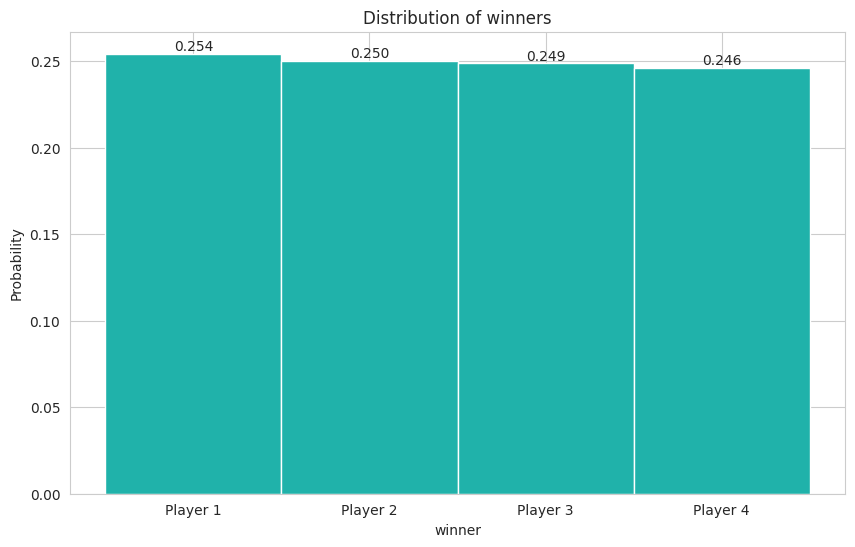

In [104]:
high_board_size_results_df = run_mensch_simulation(n_rounds=50000, board_size=4000)
show_winner_distribution(high_board_size_results_df)

## Central Limit Theorem

In this section, we first choose 3 different distributions and take samples from them, then we observe and evaluate the central limit theorem on the samples' mean.

#### Distribution 1: Exponential Distribution

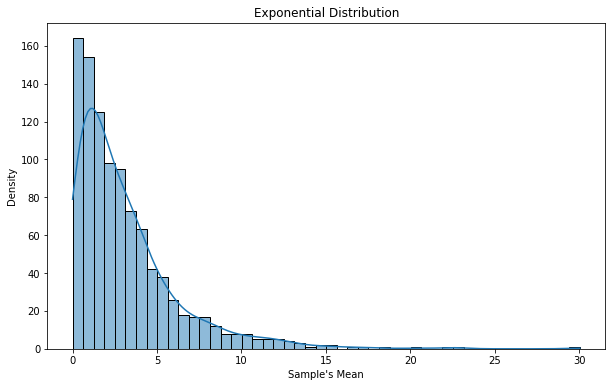

In [84]:
exp_sample = np.random.exponential(scale = 3, size=1000)
plt.figure(figsize=(10, 6))
sns.histplot(exp_sample, kde=True)
plt.xlabel('Sample\'s Mean')
plt.ylabel('Density')
plt.title('Exponential Distribution')
plt.show()

In [85]:
def exponential_distribution_mean_sampling(sampling_rate: int, sample_size: int):
    mean_samples = []

    for i in range(0, sampling_rate):
        exp_sample = np.random.exponential(scale = 3, size=sample_size)
        exp_sample_mean = exp_sample.mean()
        mean_samples.append(exp_sample_mean)
        
    plt.figure(figsize=(10, 6))
    y, x, _ = plt.hist(mean_samples)
    plt.xlabel('Sample\'s Mean')
    plt.ylabel('Density')
    plt.title('Distribution of the Exponential Distribution Sample\'s mean')
    
    # Fit a normal distribution curve
    mu, std = norm.fit(mean_samples)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    p_scaled = p * (y.max()/max(p))
    plt.plot(x, p_scaled, 'k', linewidth=2)
    
    plt.show()

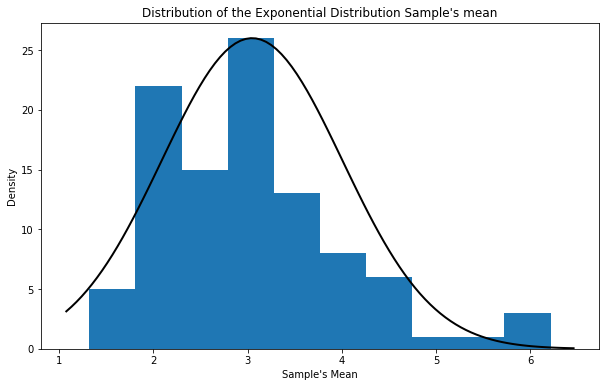

In [86]:
SAMPLING_RATE = 100
SAMPLE_SIZE = 10
exponential_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

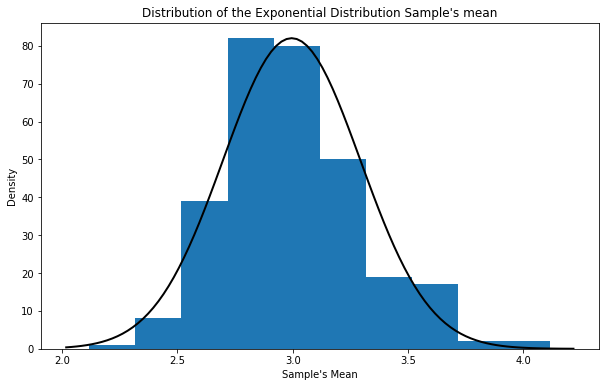

In [87]:
SAMPLING_RATE = 300
SAMPLE_SIZE = 100
exponential_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

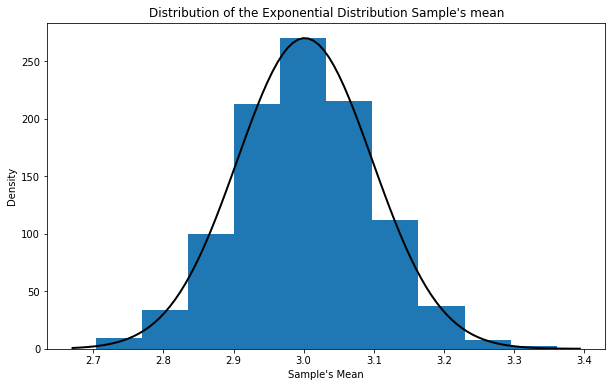

In [88]:
SAMPLING_RATE = 1000
SAMPLE_SIZE = 1000
exponential_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

#### Distribution 2: Pareto Distribution

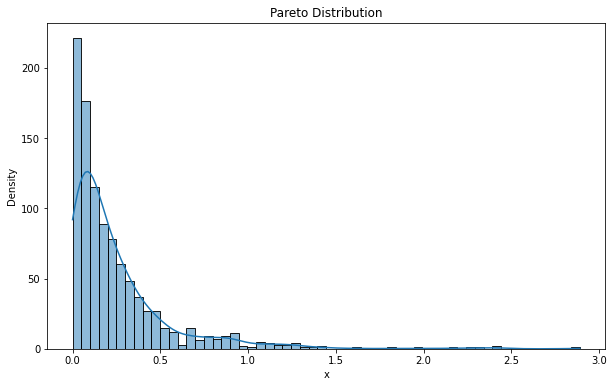

In [89]:
pareto_sample = np.random.pareto(a = 5, size=1000)
plt.figure(figsize=(10, 6))
sns.histplot(pareto_sample, kde=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Pareto Distribution')
plt.show()

In [90]:
def pareto_distribution_mean_sampling(sampling_rate: int, sample_size: int):
    mean_samples = []

    for i in range(0, sampling_rate):
        exp_sample = np.random.pareto(a = 5, size=sample_size)
        exp_sample_mean = exp_sample.mean()
        mean_samples.append(exp_sample_mean)
        
    plt.figure(figsize=(10, 6))
    y, x, _ = plt.hist(mean_samples)
    plt.xlabel('Sample\'s Mean')
    plt.ylabel('Density')
    plt.title('Distribution of the Pareto distribution Sample\'s mean')
    
    
    # Fit a normal distribution curve
    mu, std = norm.fit(mean_samples)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    p_scaled = p * (y.max()/max(p))
    plt.plot(x, p_scaled, 'k', linewidth=2)
    
    plt.show()

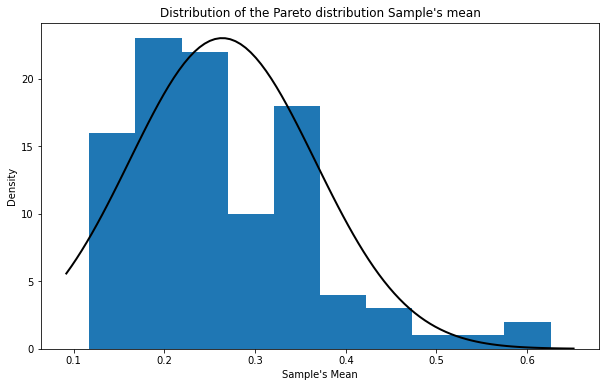

In [91]:
SAMPLING_RATE = 100
SAMPLE_SIZE = 10
pareto_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

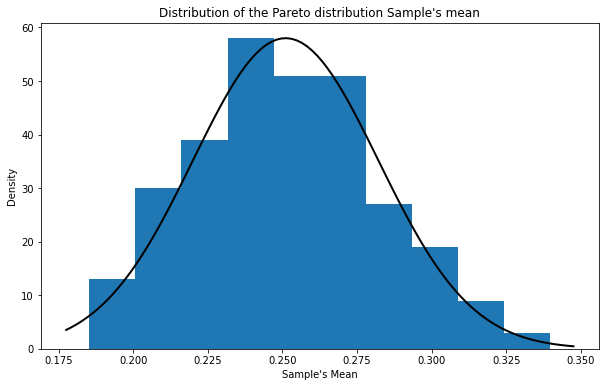

In [92]:
SAMPLING_RATE = 300
SAMPLE_SIZE = 100
pareto_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

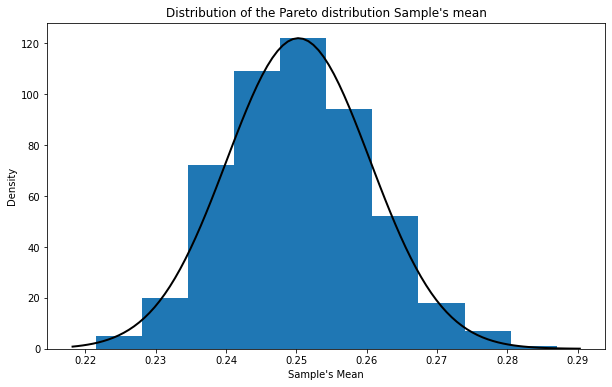

In [93]:
SAMPLING_RATE = 500
SAMPLE_SIZE = 1000
pareto_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

#### Distribution 3: Beta Distribution

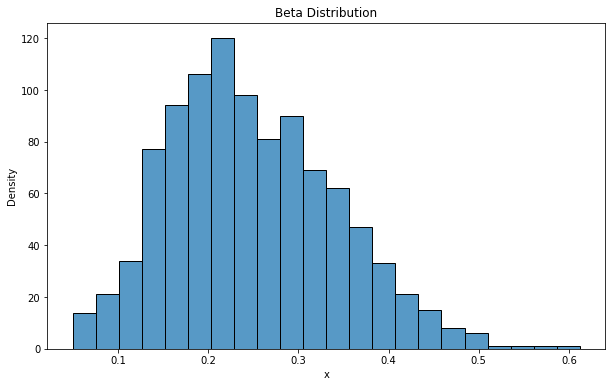

In [94]:
beta_sample = np.random.beta(a = 5, b = 15, size = 1000)
plt.figure(figsize=(10, 6))
sns.histplot(beta_sample, kde=False)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Beta Distribution')
plt.show()

In [96]:
def beta_distribution_mean_sampling(sampling_rate: int, sample_size: int):
    mean_samples = []

    for i in range(0, sampling_rate):
        exp_sample = np.random.beta(a = 5, b = 15, size=sample_size)
        exp_sample_mean = exp_sample.mean()
        mean_samples.append(exp_sample_mean)
        
    plt.figure(figsize=(10, 6))    
    y, x, _ = plt.hist(mean_samples)
    plt.xlabel('Sample\'s Mean')
    plt.ylabel('Density')
    plt.title('Distribution of the Beta Distribution sample\'s mean')
    
    # Fit a normal distribution curve
    mu, std = norm.fit(mean_samples)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    p_scaled = p * (y.max()/max(p))
    plt.plot(x, p_scaled, 'k', linewidth=2)
    
    
    plt.show()

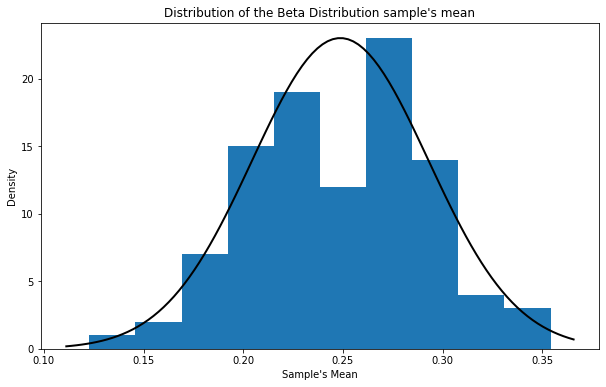

In [97]:
SAMPLING_RATE = 100
SAMPLE_SIZE = 5
beta_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

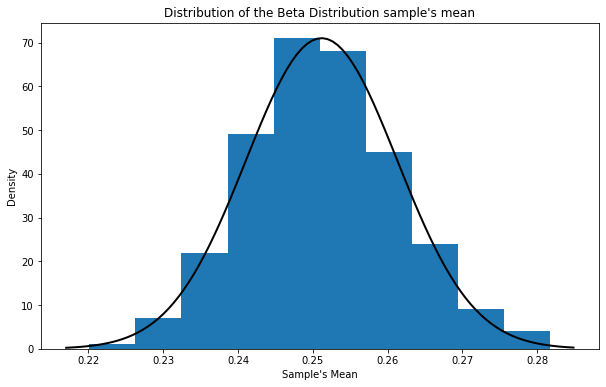

In [98]:
SAMPLING_RATE = 300
SAMPLE_SIZE = 100
beta_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

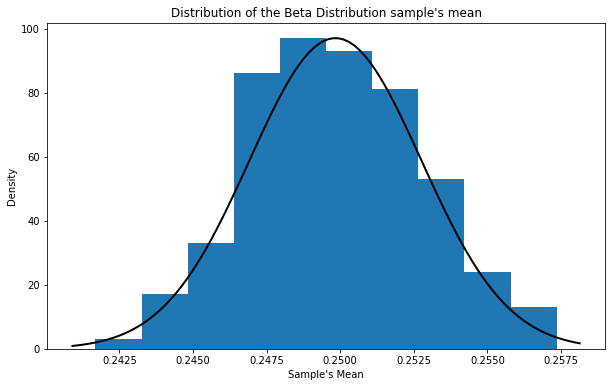

In [99]:
SAMPLING_RATE = 500
SAMPLE_SIZE = 1000
beta_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

Analysis: As we can see in all 3 distribution's that we provided here, the mean of independant samples from each distribution with the sample size of larger than 30, the mean of samples can be modeled as a normal distribution.  

## Hypothesis Testing

### Unfair Coin

In [17]:
from scipy import stats
import math

### Unfair Coin

In [18]:
def flipping_a_coin(p_head: float) -> str:
    if random.random() > p_head:
        return 'Tail'
    else:
        return 'Head'
    
def coin_flipping_simulator(n_rounds) -> None:
    # defining the probabilities of seeing head and tails
    p_head = 0.6
    p_tail = 0.4

    head_count = 0
    tail_count = 0
    for i in range(0, n_rounds):
        if flipping_a_coin(p_head) == 'Head':
            head_count += 1
        else:
            tail_count += 1
            
    print(f"Ratio of observing head face in {n_rounds} rounds:", float(head_count/n_rounds))
    return head_count

In [19]:
def calculate_p_value(observed_heads, n_rounds):
    # Assuming null hypothesis: the coin is fair
    # Calculate p-value using binomial test
    binomtestresult = stats.binomtest(observed_heads, n=n_rounds, p=0.5, alternative='greater')
    alpha = 0.05
    print("\n-------------------- P-Value Testing --------------------")
    print(f"P-value test (binomtest) result: {binomtestresult}")
    if binomtestresult.pvalue < alpha:
        print(f"The P-value is {binomtestresult.pvalue}, lower than alhpha={alpha}, thus the null hypothesis is rejected")
    else:
        print(f"The P-value is {binomtestresult.pvalue}, higher than alhpha={alpha}, thus the null hypothesis can not be rejected")
    # return p_value

In [20]:
def calculate_confidence_interval(observed_heads, n_rounds):
    mean = observed_heads / n_rounds
    std_dev = math.sqrt(n_rounds*(observed_heads / n_rounds)*(1 - (observed_heads / n_rounds)))
    margin_of_error = 1.96 * (std_dev / np.sqrt(n_rounds))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    print("\n-------------------- Confidence Interval Testing --------------------")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print("Z-score:", (observed_heads/n_rounds - 0.5) / std_dev)
    if(0.5 > lower_bound and 0.5 < upper_bound):
        print(f"Null hypothesis in inside of the 95'%' confidence interval, thus we can not reject the null hypothesis")
    else:
        print(f"Null hypothesis in outside of the 95'%' confidence interval, thus we can not reject the null hypothesis")
    return (lower_bound, upper_bound)

Simulating:

In [21]:
n_rounds = 30
head_count = coin_flipping_simulator(n_rounds)
calculate_p_value(head_count, n_rounds)
calculate_confidence_interval(head_count, n_rounds)

Ratio of observing head face in 30 rounds: 0.6666666666666666

-------------------- P-Value Testing --------------------
P-value test (binomtest) result: BinomTestResult(k=20, n=30, alternative='greater', proportion_estimate=0.6666666666666666, pvalue=0.049368573352694525)
The P-value is 0.049368573352694525, lower than alhpha=0.05, thus the null hypothesis is rejected

-------------------- Confidence Interval Testing --------------------
Lower bound: -0.2572861940837555
Upper bound: 1.590619527417089
Z-score: 0.06454972243679026
Null hypothesis in inside of the 95'%' confidence interval, thus we can not reject the null hypothesis


(-0.2572861940837555, 1.590619527417089)

In [22]:
n_rounds = 100
head_count = coin_flipping_simulator(n_rounds)
calculate_p_value(head_count, n_rounds)
calculate_confidence_interval(head_count, n_rounds)

Ratio of observing head face in 100 rounds: 0.66

-------------------- P-Value Testing --------------------
P-value test (binomtest) result: BinomTestResult(k=66, n=100, alternative='greater', proportion_estimate=0.66, pvalue=0.0008949651957434264)
The P-value is 0.0008949651957434264, lower than alhpha=0.05, thus the null hypothesis is rejected

-------------------- Confidence Interval Testing --------------------
Lower bound: -0.2684691917344376
Upper bound: 1.5884691917344376
Z-score: 0.03377602647365994
Null hypothesis in inside of the 95'%' confidence interval, thus we can not reject the null hypothesis


(-0.2684691917344376, 1.5884691917344376)

In [23]:
n_rounds = 1000
head_count = coin_flipping_simulator(n_rounds)
calculate_p_value(head_count, n_rounds)
calculate_confidence_interval(head_count, n_rounds)

Ratio of observing head face in 1000 rounds: 0.583

-------------------- P-Value Testing --------------------
P-value test (binomtest) result: BinomTestResult(k=583, n=1000, alternative='greater', proportion_estimate=0.583, pvalue=8.50881235528651e-08)
The P-value is 8.50881235528651e-08, lower than alhpha=0.05, thus the null hypothesis is rejected

-------------------- Confidence Interval Testing --------------------
Lower bound: -0.3834032375773584
Upper bound: 1.5494032375773583
Z-score: 0.005323236820334142
Null hypothesis in inside of the 95'%' confidence interval, thus we can not reject the null hypothesis


(-0.3834032375773584, 1.5494032375773583)

Analysis: We decide on the correctness of the Null claims about the fairness of the coin by using Hypotheses Testing and Confidence Interval evaluation. The more the sample size, the more accurate our observation will be, thus we can rely more on our decision on the hypothesis/condfidencee interval testing. 

### T-Test

### Job Placement

## Questions

### Q1

Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?

### Q2

How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?

Low sample size will result in covering the distribution domain incompletely, thus the output plots cannot be modeled well by using the CLT theorem (since our samples haas bias). By increasing the size of our samples, we reduce the bias in our sampling thus and we see that the output plots of the samples's means can be modeled by a normal distribution, just as the CLT theorem presents. 

### Q3

How does increasing the sample size affect your coin test?

The more the sample size, the more accurate the real probability of observing head and tails will be resulted, thus we can rely more on our observation in order to perform hypothesis tests and evalutions based on using confidence intervals.

### Q4

What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?

### Q5

What are the preliminary conditions for using t-test on our data?

### Q6

Read about some other types of tests that are used in scientific research. Write a line about each of them.